In [117]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [ ]:
data_licence = pd.read_csv("licence.csv")
data_master = pd.read_csv("masters.csv")

Nettoyage et structuration des données:

In [119]:
parcours = [
    "Comptabilité", 
    "Management", 
    "Mathématiques Appliquées à l’Analyse des Données et à l’Aide à la Décision", 
    "Business Intelligence", 
    "Business Information Systems"
]
data_licence.insert(0, "Parcours", parcours[:len(data_licence)])

In [121]:
competences_licence = data_licence[["Parcours", "Compétences"]]
competences_master = data_master[["Parcours", "Compétences"]]
data_competences = pd.concat([competences_licence, competences_master], ignore_index=True)
data_competences

,Parcours,Compétences
0,Comptabilité,Maîtriser les techniques d’élaboration des sup...
1,Management,Analyser les évolutions de l’environnement des...
2,Mathématiques Appliquées à l’Analyse des Donné...,Aider les organisations à créer de la valeur o...
3,Business Intelligence,Maîtriser l’utilisation de l’outil informatiqu...
4,Business Information Systems,Concevoir et développer une solution décisionn...
5,marketing digital,Préparer les contenus de la communication (ben...
6,"Comptabilité, Contrôle, Audit",Maîtriser parfaitement la technique comptable ...
7,Management Digital et Systèmes d’Information,Anticiper et gérer les changements liés à la t...
8,Gestion Actuarielle et Modélisation Mathématique,Adapter les outils de traitement statistique d...
9,Finance Digitale,Analyser et gérer les risques financiers par l...


In [122]:
# S'assurer que la colonne 'Compétences' contient bien des chaînes de caractères
data_competences['Compétences'] = data_competences['Compétences'].fillna('')  # Remplacer NaN par des chaînes vides
data_competences['Compétences'] = data_competences['Compétences'].astype(str)  # Convertir en chaînes de caractères

# Séparer les compétences par une virgule
data_competences['Compétences'] = data_competences['Compétences'].str.split(',')

# "Exploser" les lignes pour avoir une ligne par compétence
data_competences = data_competences.explode('Compétences')

# Nettoyer les espaces avant et après chaque compétence
data_competences['Compétences'] = data_competences['Compétences'].str.strip()

data_competences = data_competences.reset_index(drop=True)

# Vérifier le résultat
print(data_competences.head)

<bound method NDFrame.head of               Parcours                                        Compétences
0         Comptabilité  Maîtriser les techniques d’élaboration des sup...
1         Comptabilité  Établir les déclarations fiscales et sociales ...
2         Comptabilité  Préparer un rapport complet d’analyse financiè...
3         Comptabilité  Intervenir en tant que collaborateur dans les ...
4         Comptabilité  Intervenir et évoluer dans un milieu juridique...
..                 ...                                                ...
60    Finance Digitale  Maîtriser les nouvelles technologies appliquée...
61    Finance Digitale  Auditer et valider la sécurité des systèmes d’...
62    Finance Digitale                                                   
63  Business Analytics                                     Conceptualiser
64  Business Analytics  modéliser et analyser des données massives hét...

[65 rows x 2 columns]>


In [123]:
# Identifier les valeurs manquantes
print(data_competences.isnull().sum())

Parcours       0
Compétences    0
dtype: int64


In [124]:
# Remplacer les caractères spéciaux pour toutes les colonnes (si elles contiennent du texte)
data_competences = data_competences.apply(lambda x: x.str.replace(r"[^\w\s]", " ", regex=True) if x.dtype == "object" else x)

# Supprimer les espaces multiples dans toutes les colonnes
data_competences = data_competences.apply(lambda x: x.str.replace(r"\s+", " ", regex=True).str.strip() if x.dtype == "object" else x)


In [125]:
# Transformer en minuscules pour homogénéiser
data_competences["Parcours"] = data_competences["Parcours"].str.lower()
data_competences["Compétences"] = data_competences["Compétences"].str.lower()

In [126]:
# Supprimer les doublons
data_competences = data_competences.drop_duplicates()
data_competences.head()

,Parcours,Compétences
0,comptabilité,maîtriser les techniques d élaboration des sup...
1,comptabilité,établir les déclarations fiscales et sociales ...
2,comptabilité,préparer un rapport complet d analyse financiè...
3,comptabilité,intervenir en tant que collaborateur dans les ...
4,comptabilité,intervenir et évoluer dans un milieu juridique...


In [127]:
#Renommer les données 

data_competences["Parcours"]= data_competences["Parcours"].replace({
    "comptabilité": "LSGC",
    "management": "LSGM",
    "mathématiques appliquées à l analyse des données et à l aide à la décision": "LMAD",
    "business intelligence": "BI",
    "business information systems": "BIS",
    "marketing digital": "MKD",
    "comptabilité contrôle audit": "CCA",
    "management digital et systèmes d information": "MDSI",
    "gestion actuarielle et modélisation mathématique": "GAMMA",
    "finance digitale": "FIND",
    "business analytics": "BA"
})


data_competences.head()

,Parcours,Compétences
0,LSGC,maîtriser les techniques d élaboration des sup...
1,LSGC,établir les déclarations fiscales et sociales ...
2,LSGC,préparer un rapport complet d analyse financiè...
3,LSGC,intervenir en tant que collaborateur dans les ...
4,LSGC,intervenir et évoluer dans un milieu juridique...
...,...,...
60,FIND,maîtriser les nouvelles technologies appliquée...
61,FIND,auditer et valider la sécurité des systèmes d ...
62,FIND,
63,BA,conceptualiser


Analyse Descriptive: 

In [137]:
# Résumé général
print(data_competences.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Parcours     65 non-null     object
 1   Compétences  65 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB
None


In [138]:
# Nombre de lignes et colonnes
print(f"Nombre de lignes: {data_competences.shape[0]}, Nombre de colonnes: {data_competences.shape[1]}")

Nombre de lignes: 65, Nombre de colonnes: 2


In [139]:
# Vérifier les valeurs manquantes
print(data_competences.isnull().sum())

Parcours       0
Compétences    0
dtype: int64


In [140]:
# Modalités 
modalites = data_competences['Compétences'].unique()
print("Modalités :")
modalites


Modalités :


array(['maîtriser les techniques d élaboration des supports de communication comptables',
       'établir les déclarations fiscales et sociales légales ainsi que les états financiers',
       'préparer un rapport complet d analyse financière d une entreprise à des fins de gestion et d aide à la prise de décision',
       'intervenir en tant que collaborateur dans les missions d audit financier interne externe de contrôle de gestion et de conseil comptable et fiscal',
       'intervenir et évoluer dans un milieu juridique et socioéconomique digitalisé',
       'la licence en sciences de gestion parcours comptabilité s organise en 2 semestres de tronc commun et 4 semestres de spécialisation en sciences comptables',
       'analyser les évolutions de l environnement des affaires',
       'analyser des données et prendre des décisions',
       'argumenter et choisir sa stratégie de négociation commerciale',
       'evaluer des situations complexes et résoudre des problèmes',
       'gérer 

In [141]:
# Effectif par module
effectifs = data_competences['Compétences'].value_counts()
print("Effectifs :")
effectifs

Effectifs :


Compétences
la délivrance du diplôme est en outre soumise à l obtention du niveau b2 en français et en anglais                                                                                                                                                                                                                                                        2
                                                                                                                                                                                                                                                                                                                                                          2
maîtriser les techniques d élaboration des supports de communication comptables                                                                                                                                                                                                                     

In [142]:
# Fréquences relatives
frequences = data_competences['Compétences'].value_counts(normalize=True)
print("Fréquences relatives :")
frequences

Fréquences relatives :


Compétences
la délivrance du diplôme est en outre soumise à l obtention du niveau b2 en français et en anglais                                                                                                                                                                                                                                                        0.030769
                                                                                                                                                                                                                                                                                                                                                          0.030769
maîtriser les techniques d élaboration des supports de communication comptables                                                                                                                                                                                                       

In [143]:
# Pourcentages
pourcentages = frequences * 100
print("Pourcentages :")
print(pourcentages)

Pourcentages :
Compétences
la délivrance du diplôme est en outre soumise à l obtention du niveau b2 en français et en anglais                                                                                                                                                                                                                                                        3.076923
                                                                                                                                                                                                                                                                                                                                                          3.076923
maîtriser les techniques d élaboration des supports de communication comptables                                                                                                                                                                                        

In [144]:
# Tableau statistique
tableau_statistique = pd.DataFrame({
    'Effectif': effectifs,
    'Fréquence Relative': frequences,
    'Pourcentage': pourcentages
})

# Réorganiser l'ordre des colonnes et ajouter un index propre
tableau_statistique = tableau_statistique.reset_index().rename(columns={'index': 'Module'})
print("Tableau Statistique :")
tableau_statistique.head()

Tableau Statistique :


,Compétences,Effectif,Fréquence Relative,Pourcentage
0,la délivrance du diplôme est en outre soumise ...,2,0.030769,3.076923
1,,2,0.030769,3.076923
2,maîtriser les techniques d élaboration des sup...,1,0.015385,1.538462
3,intervenir en tant que collaborateur dans les ...,1,0.015385,1.538462
4,intervenir et évoluer dans un milieu juridique...,1,0.015385,1.538462


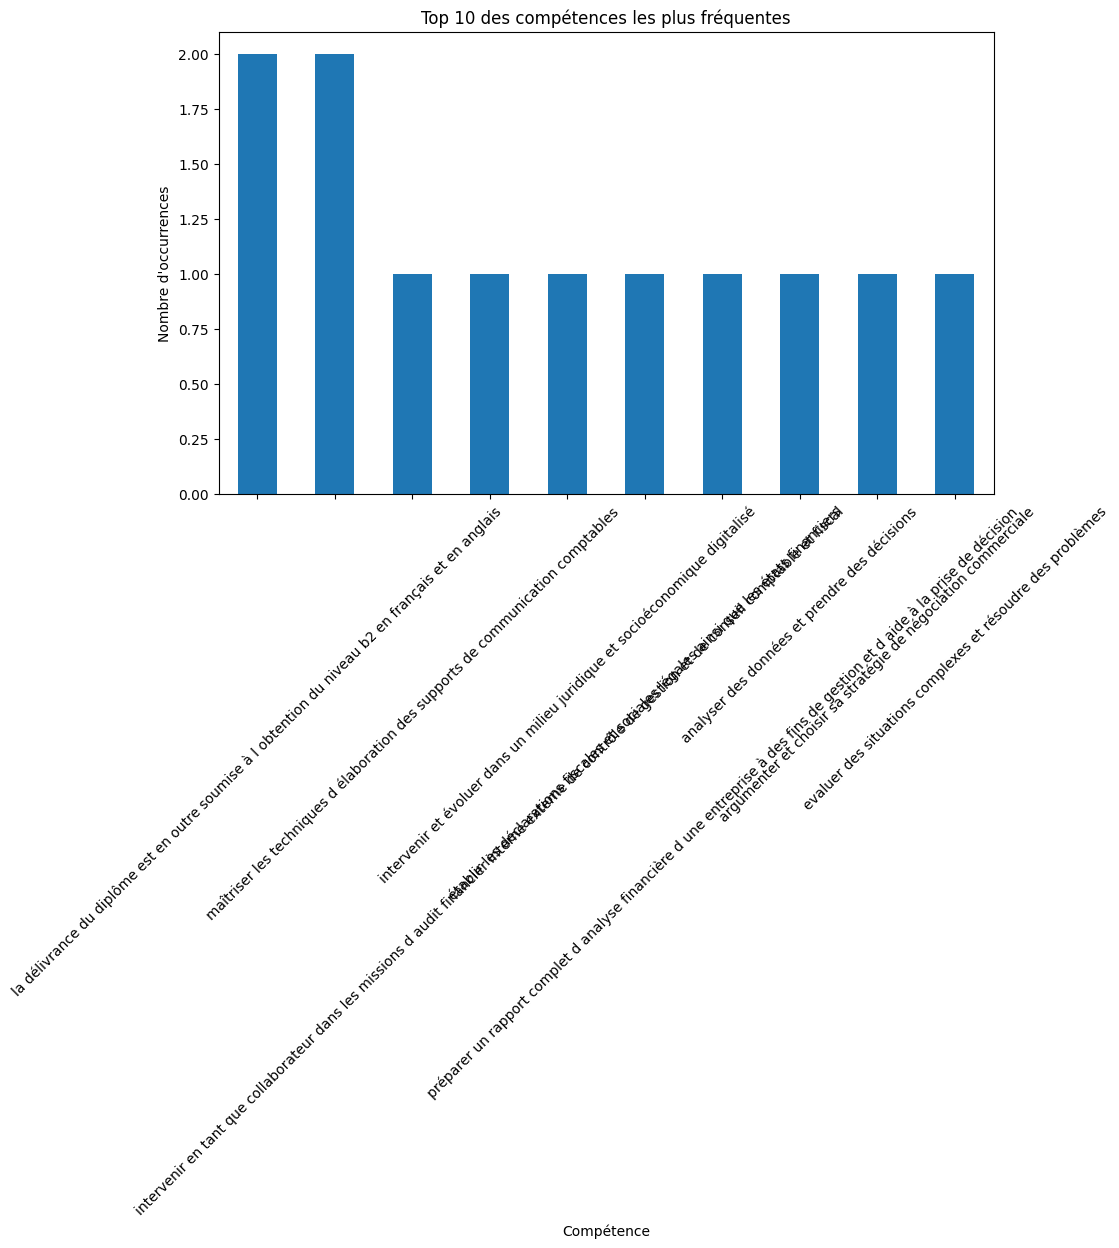